<a href="https://colab.research.google.com/github/suminpixel/computer-vision-class/blob/main/Colorization_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir models img



In [ ]:
!pip install gdown


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=145C519ZUwqqFsD6VmxUOyO4KtDRD7ttX' -O ./img/sampe01.jpg;
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1u1kDBBxqm9VCF9PCzJqc5_PrDF0_GzHU' -O ./img/sampe02.jpg;
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZgdLqly9MoQrvMEel9CrxSE5hORE0a1M' -O ./img/sampe03.jpg;
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Vbt9ypZ5-wPmH2UnGajpvy0F-TI4KGzW' -O ./img/sampe04.jpg;
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FxJFYOOmlKvbemoyxdGH85JhhaLgbcyI' -O ./img/sampe05.jpg;
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-7mfz1IsE6UeWQV8BWU3wUv3bOytqqh-' -O ./img/sampe06.jpg;
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V0cHfop5kDV9_0XD002WV-4mjqFBR2Yg' -O ./img/sampe07.jpg;

--2021-04-06 10:08:31--  https://docs.google.com/uc?export=download&id=145C519ZUwqqFsD6VmxUOyO4KtDRD7ttX
Resolving docs.google.com (docs.google.com)... 173.194.216.102, 173.194.216.139, 173.194.216.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uc2nrtkfcsmhdetfl3f3v2voiqkudb26/1617703650000/02396526014819477879/*/145C519ZUwqqFsD6VmxUOyO4KtDRD7ttX?e=download [following]
--2021-04-06 10:08:31--  https://doc-14-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uc2nrtkfcsmhdetfl3f3v2voiqkudb26/1617703650000/02396526014819477879/*/145C519ZUwqqFsD6VmxUOyO4KtDRD7ttX?e=download
Resolving doc-14-1s-docs.googleusercontent.com (doc-14-1s-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-14-1s-docs.googleusercontent.com (doc-14

In [ ]:
!gdown --id 13J2qJKjDsA0j0ZV5-t6DEXdy79gt-QdZ --output ./models/pts_in_null.npy #정보를 담고있는 npy 
!gdown --id 1c2T6C6rTeW-iF4Gnxc7vH6JriPubDevg --output ./models/colorization_deploy.prototxt
!gdown --id 1KJ_YOVhong7mmowAq-xsM27bmhYcwMUf --output ./models/colorization_release.coffemodel #PRG 기준
!gdown --id 12C4m4KjQdZmZNttDZe5JSa6OEhTqqNit --output ./models/colorization_release_norebal.coffemodel #CMYK (비교적 안전한 모델


Downloading...
From: https://drive.google.com/uc?id=13J2qJKjDsA0j0ZV5-t6DEXdy79gt-QdZ
To: /content/models/pts_in_null.npy
100% 5.09k/5.09k [00:00<00:00, 4.06MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c2T6C6rTeW-iF4Gnxc7vH6JriPubDevg
To: /content/models/colorization_deploy.prototxt
100% 9.95k/9.95k [00:00<00:00, 16.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KJ_YOVhong7mmowAq-xsM27bmhYcwMUf
To: /content/models/colorization_release.coffemodel
129MB [00:00, 149MB/s]
Downloading...
From: https://drive.google.com/uc?id=12C4m4KjQdZmZNttDZe5JSa6OEhTqqNit
To: /content/models/colorization_release_norebal.coffemodel
129MB [00:00, 138MB/s]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #그래프 표현

proto = './models/colorization_deploy.prototxt'
weight = './models/colorization_release.coffemodel'

pts_in_null = np.load('./models/pts_in_null.npy')
pts_in_null = pts_in_null.transpose().reshape(2, 313, 1, 1).astype(np.float32) #데이터를 표현하는 단위를 float32로 맞춤

net = cv2.dnn.readNetFromCaffe(proto, weight)

net.getLayer(net.getLayerId('class8_ab')).blobs = [pts_in_null]
net.getLayer(net.getLayerId('conv8_313_rh')).blobs = [np.full((1, 313), 2.606, np.float32)]




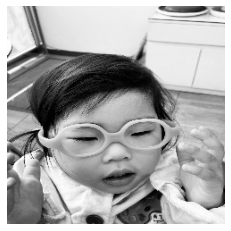

In [ ]:
img_path =  './img/test.jpeg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_input = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_rgb = img.copy()

img_rgb = (img_rgb / 255.).astype(np.float32)

img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

img_l = img_lab[:, :, 0]

input_img = cv2.resize(img_l, (244, 244))
input_img -= 50

plt.axis('off')
plt.imshow(input_img, cmap='gray')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


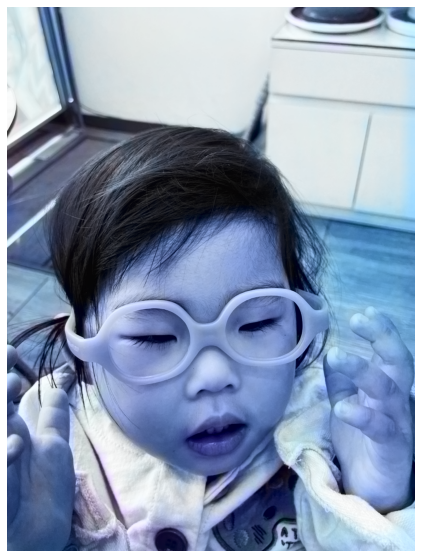

In [ ]:
net.setInput(cv2.dnn.blobFromImage(input_img))
pred = net.forward()[0, :, :].transpose((1, 2, 0))

pred_resize = cv2.resize(pred, (img.shape[1], img.shape[0]))

pred_lab = np.concatenate([img_l[:, :, np.newaxis], pred_resize], axis=2)

pred_rgb = cv2.cvtColor(pred_lab, cv2.COLOR_LAB2BGR)
pred_rgb = np.clip(pred_rgb, 0, 1) * 255
pred_rgb = pred_rgb.astype(np.uint8)

fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1).axis('off')
plt.imshow(img_l, cmap='gray')
fig.add_subplot(1,2,1).axis('off')
plt.imshow(pred_rgb)
